You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official FIFA World Cup matches (not including qualifiers) since 2002-01-01.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: women_results.csv and men_results.csv.

The question you are trying to determine the answer to is:

Are more goals scored in women's international soccer matches than men's?

You assume a 10% significance level, and use the following null and alternative hypotheses:

 H₀: The mean number of goals scored in women's international soccer matches is the same as men's.

 Hₐ: The mean number of goals scored in women's international soccer matches is greater than men's.

---------------------------------------------------------------------------------

Project Instructions
Perform an appropriate hypothesis test to determine the p-value, and hence result, of whether to reject or fail to reject the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as men's. Use a 10% significance level.

For this analysis, you'll use Official FIFA World Cup matches since 2002-01-01, and you'll also assume that each match is fully independent, i.e., team form is ignored.

The p-value and the result of the test must be stored in a dictionary called result_dict in the form:

result_dict = {"p_val": p_val, "result": result}

where p_val is the p-value and result is either the string "fail to reject" or "reject", depending on the result of the test.



How to approach the project
1. Exploratory data analysis

2. Filtering the data

3. Choosing the correct hypothesis test

4. Performing the hypothesis test

5. Interpreting the result of the hypothesis test

In [96]:
#Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pingouin


1. Exploratory data analysis

In [80]:
#Load the data from men_results.csv and women_results.csv to understand its contents

men = pd.read_csv("C:/Users/Emigb/Documents/Data Science/datasets/men_results.csv")
women = pd.read_csv("C:/Users/Emigb/Documents/Data Science/datasets/women_results.csv")

print("Men DataFrame:")
print(men.head())

print("\nWomen DataFrame:")
print(women.head())


Men DataFrame:
   Unnamed: 0        date home_team away_team  home_score  away_score  \
0           0  1872-11-30  Scotland   England           0           0   
1           1  1873-03-08   England  Scotland           4           2   
2           2  1874-03-07  Scotland   England           2           1   
3           3  1875-03-06   England  Scotland           2           2   
4           4  1876-03-04  Scotland   England           3           0   

  tournament  
0   Friendly  
1   Friendly  
2   Friendly  
3   Friendly  
4   Friendly  

Women DataFrame:
   Unnamed: 0        date home_team  away_team  home_score  away_score  \
0           0  1969-11-01     Italy     France           1           0   
1           1  1969-11-01   Denmark    England           4           3   
2           2  1969-11-02   England     France           2           0   
3           3  1969-11-02     Italy    Denmark           3           1   
4           4  1975-08-25  Thailand  Australia           3          

In [81]:
#1b. Determining the column names, data types, and values

men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [82]:
men['tournament'].value_counts()

tournament
Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
Évence Coppée Trophy                        1
FIFA 75th Anniversary Cup                   1
Real Madrid 75th Anniversary Cup            1
TIFOCO Tournament                           1
Copa Confraternidad                         1
Name: count, Length: 141, dtype: int64

In [83]:
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB


In [84]:
#1c. Coverting the date column to date-time data type

men['date'] = pd.to_datetime(men['date'])
women['date'] = pd.to_datetime(women['date'])



In [85]:
#2. Filtering the data, Filter the data to only include official FIFA World Cup matches that took place after 2002-01-01.

men_fifa = men[(men['tournament'] == 'FIFA World Cup') & (men['date'] > '2002-01-01')]
men_fifa.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


In [86]:
women_fifa = women[(women['tournament'] == 'FIFA World Cup') & (women['date'] > '2002-01-01')]
women_fifa.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


3. Choosing the correct hypothesis test

In [87]:
#3. Create New Columns: 'group' and 'goals_scored'
men_fifa['group'] = 'men'
women_fifa['group'] = 'women'

men_fifa['total_goals'] = men_fifa['home_score'] + men_fifa['away_score']
women_fifa['total_goals'] = women_fifa['home_score'] + women_fifa['away_score']


#You need the total goals per match for comparison, and the group labels help when merging both datasets.


In [88]:
men_fifa.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,total_goals
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,men,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,men,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,men,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,men,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,men,1


In [89]:
women_fifa.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,total_goals
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women,4


Because there are two independent groups, men's and women's, this scenario requires an unpaired two-sample test.
An unpaired t-test and a Wilcoxon-Mann-Whitney test are the two most commmon two-sample tests, where the Wilcoxon-Mann-Whitney test is a non-parametric version of the unpaired t-test.
To determine if a parametric or non-parametric test is appropriate, you'll need to verify the underlying assumptions of parametric tests, including checking the sample size in each group and the normality of each distribution.


----------------------------------------------------------------------------



Determining if the data is normally distributed

The normal distribution is a symmetric bell-shaped curve, with the distribution centered around the mean.
Plotting a histogram displaying the distribution of the number of goals scored in men's and women's matches will give you an idea about whether the dataset is normally distributed or not.
If the normality is unclear from the plot, you can run a test of normality, such as a Kolmogorov–Smirnov test or the Shapiro–Wilk test.

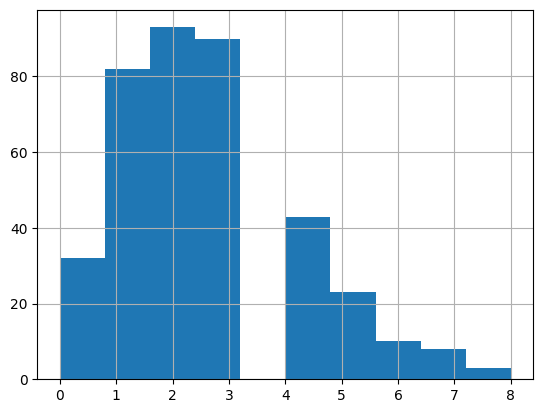

In [90]:
#4. Plot Histogram to Check for Normality

plt.hist(men_fifa['total_goals'])
plt.gca().grid(True)
plt.show()


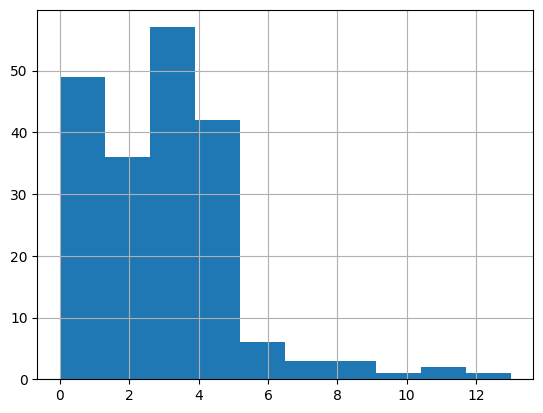

In [91]:
plt.hist(women_fifa['total_goals'])
plt.gca().grid(True)
plt.show()

Performing the hypothesis test
-------------------------------------------------------
Once you've decided on the correct hypothesis test to perform, carry out the test to return the p-value.

In [92]:
#Combine dataset
men_women = pd.concat([men_fifa, women_fifa], axis=0, ignore_index=True)
men_women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,total_goals
0,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,men,1
1,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,men,8
2,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,men,2
3,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,men,3
4,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,men,1


In [93]:
#Hypothesis testing using pingouin (Wilcoxon-Mann-Whitney test)
#Step1: Convert Data to long format
mw_wide = men_women.pivot(columns = 'group',
                          values = 'total_goals')

#Step2: Run the Mann-Whitney U Test (Pingouin)
result_mw = pingouin.mwu(x=mw_wide['women'],
             y=mw_wide['men'],
             alternative='greater')

print(result_mw)


       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107  0.126901  0.563451


In [94]:
p_val = result_mw['p-val'].values[0]
print(p_val)

0.005106609825443641


In [95]:
# Determine hypothesis test result using sig. level

if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}
result_dict

{'p_val': np.float64(0.005106609825443641), 'result': 'reject'}